    null_prob  branch_prob  bif_prob
0    0.000362     0.999638  0.999638
1    0.000606     0.999394  0.999394
2    0.001318     0.998682  0.998682
3    0.000281     0.999719  0.999719
4    0.000785     0.999215  0.999215
5    0.000282     0.999718  0.999718
6    0.000201     0.999799  0.999799
7    0.000416     0.999584  0.999584
8    0.000324     0.999676  0.999676
9    0.000356     0.999644  0.999644
10   0.000263     0.999737  0.999737
11   0.000369     0.999631  0.999631
12   0.000960     0.999040  0.999040
13   0.000232     0.999768  0.999768
14   0.000487     0.999513  0.999513
15   0.000333     0.999667  0.999667
16   0.000434     0.999566  0.999566
17   0.000359     0.999640  0.999640
    fold_prob  hopf_prob  branch_prob  null_prob  bif_prob
0    0.159140   0.323993     0.333381   0.183486  0.816514
1    0.075664   0.192289     0.716810   0.015237  0.984763
2    0.114486   0.212874     0.611548   0.061092  0.938908
3    0.107693   0.225492     0.625183   0.041632  0.958368
4 

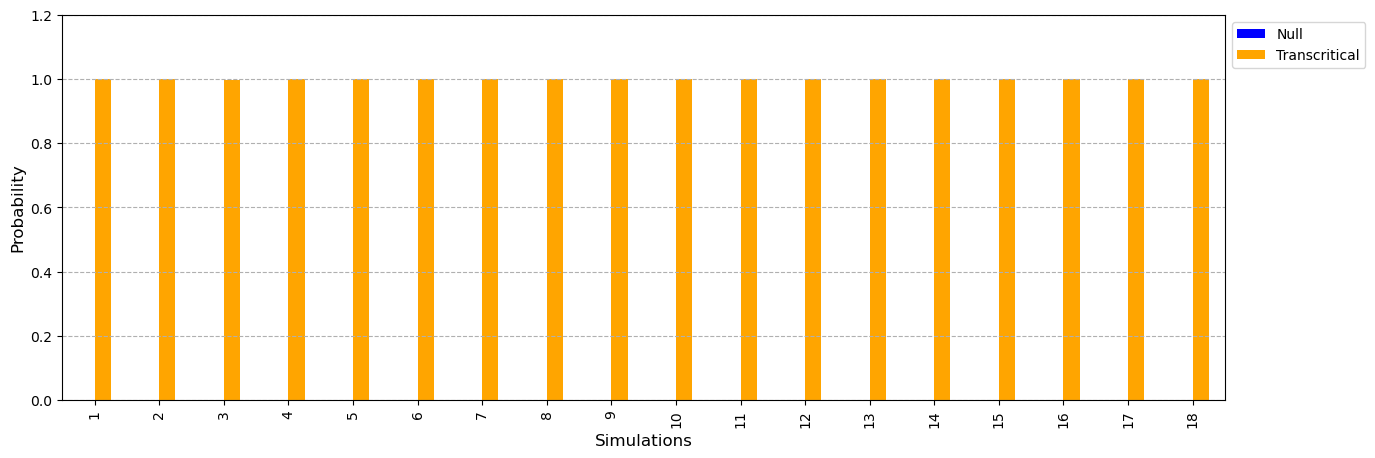

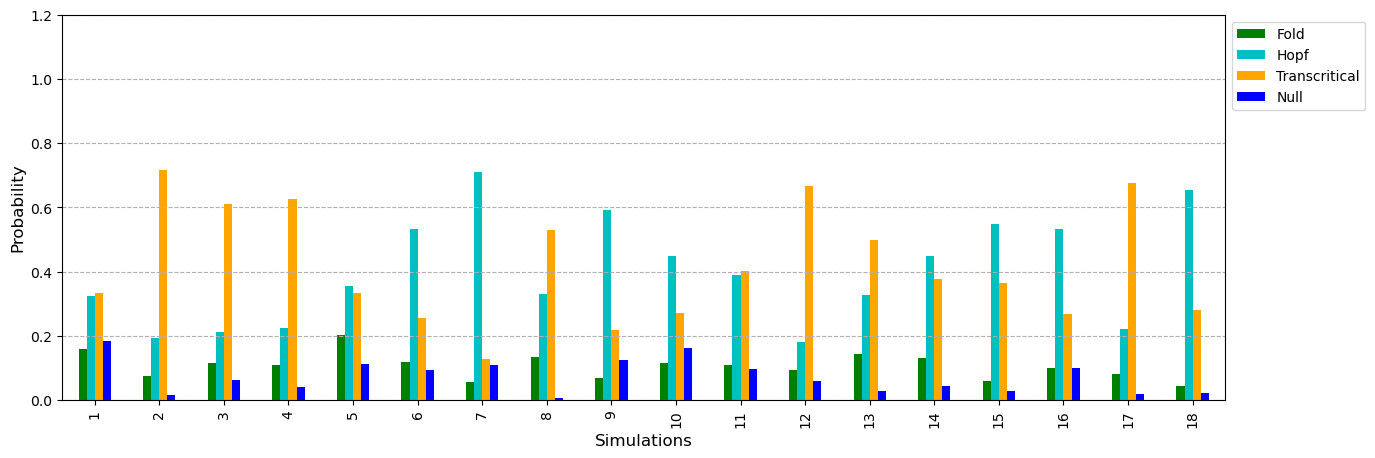

In [6]:
'''
plot of the last predictions by SIR trained and Bury et al trained 
models on the emprical Flu data. Inputs are the ensemble prediction
files of both DL models and outputs are the bar plot used in fig 5.
'''

import pandas as pd 
import matplotlib.pyplot as plt 

#plot last prediction by SIR trained DL model of the empirical Flu data 
result_df = pd.DataFrame()

NoOFfiles = 18

for i in range(1, NoOFfiles+1): 
    df_ml = pd.read_csv(r'../data/ml_pred_SIR/ensemble_trend_probs_Flu_UKforced_{}_len500.csv'.format(i)) 
    df_temp = df_ml.iloc[-1].to_frame().T
    result_df = pd.concat([result_df, df_temp], ignore_index=True)

new_columns = ['null_prob', 'branch_prob', 'bif_prob']
result_df.columns = new_columns
sort_df = result_df.iloc[:, [0, 1]]

# creating dataframe 
df = pd.DataFrame({ 
	'Simulations': [str(i) for i in range(1, NoOFfiles+1)],  
    'Null': sort_df['null_prob'][0:NoOFfiles], 
    'Transcritical': sort_df['branch_prob'][0:NoOFfiles]
}) 

df.plot(x="Simulations", y=["Null" , "Transcritical"], kind="bar", figsize=(15, 5), color = ['b','orange']) 
plt.xlabel('Simulations', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

print(result_df)

plt.savefig(r'../data/figures/fig-5a-Empirical-SIR.png', bbox_inches = 'tight')



#plot last prediction by Bury et al trained DL model of the empirical Flu data 
result_df = pd.DataFrame()

for i in range(1, NoOFfiles+1): 
    df_ml = pd.read_csv(r'../data/ml_pred_Bury/ensemble_trend_probs_Bury_Flu_UKforced_{}_len500.csv'.format(i)) 
    df_temp = df_ml.iloc[-1].to_frame().T
    result_df = pd.concat([result_df, df_temp], ignore_index=True)

new_columns = ['fold_prob', 'hopf_prob', 'branch_prob', 'null_prob', 'bif_prob']
result_df.columns = new_columns
sort_df = result_df.iloc[:, [0, 1, 2, 3]]


# creating dataframe 
df = pd.DataFrame({ 
	'Simulations': [str(i) for i in range(1, NoOFfiles+1)], 
    'Fold': sort_df['fold_prob'][0:NoOFfiles], 
	'Hopf': sort_df['hopf_prob'][0:NoOFfiles], 
    'Transcritical': sort_df['branch_prob'][0:NoOFfiles], 
	'Null': sort_df['null_prob'][0:NoOFfiles] 
}) 

df.plot(x="Simulations", y=["Fold","Hopf", "Transcritical", "Null"], kind="bar", figsize=(15, 5), color = ['g', 'c','orange','b']) 
plt.xlabel('Simulations', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

print(result_df)

plt.savefig(r'../data/figures/fig-5b-Empirical-Bauch.png', bbox_inches = 'tight')
